# ADHD Predicaion Using Bagging Meta estimator, Gradient decent, Xg boost algrothim. 

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
import math 
import string
from pathlib import Path
import os
import glob
import mne
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mutual_info_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error, classification_report, roc_curve, roc_auc_score, accuracy_score, log_loss, recall_score, precision_score, f1_score, plot_roc_curve
import warnings
warnings.filterwarnings("ignore")

# adhd.csv is the dataset of those who are suffering from adhd

In [136]:
df=pd.read_csv("adhd.csv")

In [137]:
adhd_df=df.drop(['Unnamed: 20'],axis=1)

In [138]:
adhd_df.size

1520

# Shape of Data set

In [139]:
adhd_df.shape

(76, 20)

In [140]:
adhd_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,140.703377,143.592429,148.368902,142.220346,148.598711,148.604666,148.605564,148.401697,148.659488,155.028145,148.467613,148.698891,148.665851,148.689835,148.321015,149.330968,141.963942,142.645864,142.386523,1
1,132.977629,133.583795,139.545547,133.623890,139.835687,139.288800,139.776676,138.779029,138.173876,135.292821,137.812332,134.692583,136.990766,133.740691,136.161096,132.844385,126.622103,125.794459,126.139678,1
2,146.543591,144.412220,148.730255,141.561585,149.584819,148.659928,149.576960,148.224987,149.034167,147.899721,148.996982,148.115426,148.956950,147.606344,149.324754,148.374979,142.363419,141.470247,142.412391,1
3,137.796209,136.893065,141.313007,135.692191,140.970145,141.468306,140.810852,140.945487,141.382163,141.206643,141.333355,142.190796,141.207721,141.746387,141.082023,141.444029,136.182049,136.036448,135.928943,1
4,146.172399,146.371924,151.967072,145.521323,151.673378,152.115143,151.470498,151.591723,151.499021,151.378985,151.997973,151.203300,151.600811,151.712738,151.189318,151.151706,145.275028,145.363255,144.913031,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,135.820446,135.693683,141.489594,136.326213,141.256698,142.456149,141.362038,141.977235,141.614831,142.721208,142.067440,143.721941,142.958987,143.309612,142.485871,142.644004,136.377968,137.288801,136.063534,1
72,138.246816,139.202446,145.069133,139.312007,145.115626,145.913382,145.186274,145.558015,145.268951,145.703356,144.899333,145.808268,144.893370,145.858601,145.192642,145.846372,139.112189,139.719931,138.912978,1
73,139.576766,139.822472,145.722749,139.862500,145.570672,146.215201,145.730229,146.178220,149.086773,146.497161,146.115859,146.611634,146.083864,146.688019,146.028913,147.211946,140.170014,139.898511,140.032791,1
74,138.961756,138.699116,145.441656,139.112922,145.351152,145.541250,145.460054,145.247791,145.718238,146.078770,146.203680,146.125561,145.185680,146.038462,145.960379,146.047697,140.177242,139.644828,140.314863,1


# control_df  is the Data set of healthy children

In [141]:
control_df=pd.read_csv("adhdcontrol1.csv")

# Shape of control_df

In [142]:
control_df.shape

(79, 20)

In [143]:
control_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,137.783600,136.686720,145.045200,138.570240,145.502320,145.108960,145.674720,144.911200,145.673280,145.214960,145.635440,145.442880,145.976000,145.270160,146.161840,145.341200,139.513040,139.304720,139.776320,0
1,139.196240,141.495570,145.887213,140.417804,145.441152,146.888171,145.037117,145.986770,145.378652,146.688877,145.501317,147.139188,145.687141,147.268738,145.815972,146.765685,140.201209,141.466415,140.199713,0
2,139.865804,140.130118,145.978510,140.082118,146.098588,146.584863,146.378980,146.404471,146.126274,147.558431,146.673725,146.578902,146.661569,147.113882,146.636941,147.134745,141.052784,141.202588,140.916784,0
3,125.593435,126.877995,134.152111,129.225577,134.713859,134.981743,134.875977,134.964891,134.821996,132.628456,133.423506,130.950408,133.941631,130.501624,132.577109,129.947950,124.001141,122.356974,123.268147,0
4,137.223714,137.652562,143.618066,137.697084,143.414221,143.618986,143.310091,142.983166,142.730108,142.049673,142.757152,142.231166,142.700580,141.682182,142.180480,141.210008,135.410082,135.722933,135.056021,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,143.237782,143.234953,150.473372,143.729684,150.527831,150.218615,150.617441,149.758611,149.787821,149.203692,149.938044,149.894335,150.611854,149.636042,150.161751,148.980480,144.254898,144.257585,144.070656,0
75,142.988429,142.893071,149.253403,142.897699,149.124217,149.441669,149.551320,149.396270,149.847128,150.351075,149.962428,149.951334,149.490539,149.831745,149.995508,150.123401,143.610128,144.572693,144.014838,0
76,140.723595,141.159434,148.019471,141.732936,147.760813,147.981607,147.991881,147.674235,147.868803,148.762466,148.188533,148.837117,148.596709,148.912847,148.634933,148.667481,142.567036,142.985702,143.172008,0
77,139.609096,139.742627,144.457579,138.764186,144.087689,144.227215,143.692545,143.965845,143.630352,144.336886,144.545328,146.242112,144.202870,145.402955,144.131169,144.113668,139.462545,139.187428,138.549082,0


In [144]:
df_combined = pd.concat([adhd_df, control_df])
df_combined.reset_index(inplace = True)
df_combined = df_combined.drop('index', axis = 1)

# df_combined dataset of healthy and affected childrens

In [145]:
df_combined.shape

(155, 20)

In [146]:
df_combined

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,140.703377,143.592429,148.368902,142.220346,148.598711,148.604666,148.605564,148.401697,148.659488,155.028145,148.467613,148.698891,148.665851,148.689835,148.321015,149.330968,141.963942,142.645864,142.386523,1
1,132.977629,133.583795,139.545547,133.623890,139.835687,139.288800,139.776676,138.779029,138.173876,135.292821,137.812332,134.692583,136.990766,133.740691,136.161096,132.844385,126.622103,125.794459,126.139678,1
2,146.543591,144.412220,148.730255,141.561585,149.584819,148.659928,149.576960,148.224987,149.034167,147.899721,148.996982,148.115426,148.956950,147.606344,149.324754,148.374979,142.363419,141.470247,142.412391,1
3,137.796209,136.893065,141.313007,135.692191,140.970145,141.468306,140.810852,140.945487,141.382163,141.206643,141.333355,142.190796,141.207721,141.746387,141.082023,141.444029,136.182049,136.036448,135.928943,1
4,146.172399,146.371924,151.967072,145.521323,151.673378,152.115143,151.470498,151.591723,151.499021,151.378985,151.997973,151.203300,151.600811,151.712738,151.189318,151.151706,145.275028,145.363255,144.913031,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,143.237782,143.234953,150.473372,143.729684,150.527831,150.218615,150.617441,149.758611,149.787821,149.203692,149.938044,149.894335,150.611854,149.636042,150.161751,148.980480,144.254898,144.257585,144.070656,0
151,142.988429,142.893071,149.253403,142.897699,149.124217,149.441669,149.551320,149.396270,149.847128,150.351075,149.962428,149.951334,149.490539,149.831745,149.995508,150.123401,143.610128,144.572693,144.014838,0
152,140.723595,141.159434,148.019471,141.732936,147.760813,147.981607,147.991881,147.674235,147.868803,148.762466,148.188533,148.837117,148.596709,148.912847,148.634933,148.667481,142.567036,142.985702,143.172008,0
153,139.609096,139.742627,144.457579,138.764186,144.087689,144.227215,143.692545,143.965845,143.630352,144.336886,144.545328,146.242112,144.202870,145.402955,144.131169,144.113668,139.462545,139.187428,138.549082,0


In [147]:
#X=df_combined.drop(['19'],axis=1)
#y=df_combined['19']

In [179]:
X = df_combined.iloc[:,0:18].values

In [180]:
X

array([[140.7033774, 143.5924294, 148.3689019, ..., 149.3309675,
        141.9639419, 142.6458639],
       [132.9776288, 133.5837951, 139.5455466, ..., 132.8443849,
        126.6221031, 125.7944593],
       [146.5435909, 144.4122203, 148.7302545, ..., 148.3749786,
        142.3634189, 141.4702466],
       ...,
       [140.7235953, 141.1594338, 148.0194712, ..., 148.667481 ,
        142.5670355, 142.985702 ],
       [139.6090959, 139.742627 , 144.4575789, ..., 144.113668 ,
        139.4625447, 139.1874281],
       [128.1345812, 132.6901539, 135.7648697, ..., 134.5913837,
        125.0300874, 126.2716374]])

In [181]:
Y = df_combined.iloc[:,-1].values

In [182]:
X

array([[140.7033774, 143.5924294, 148.3689019, ..., 149.3309675,
        141.9639419, 142.6458639],
       [132.9776288, 133.5837951, 139.5455466, ..., 132.8443849,
        126.6221031, 125.7944593],
       [146.5435909, 144.4122203, 148.7302545, ..., 148.3749786,
        142.3634189, 141.4702466],
       ...,
       [140.7235953, 141.1594338, 148.0194712, ..., 148.667481 ,
        142.5670355, 142.985702 ],
       [139.6090959, 139.742627 , 144.4575789, ..., 144.113668 ,
        139.4625447, 139.1874281],
       [128.1345812, 132.6901539, 135.7648697, ..., 134.5913837,
        125.0300874, 126.2716374]])

In [183]:
from sklearn.preprocessing import LabelEncoder
LY = LabelEncoder()
y = LY.fit_transform(Y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [184]:
LY.classes_

array([0, 1], dtype=int64)

In [185]:
LY.inverse_transform([1])

array([1], dtype=int64)

In [186]:
#X=df_combined.drop(['19'],axis=1)
#y=df_combined['19']

## ROC Curve

In [187]:
def plot_roc_curve(y_test,y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc=roc_auc_score(y_test,y_pred)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.title("ROC curve")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Building different ML algorithms


## Boosting Algorithm 

### Gradient Boosting Algorithm

In [192]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = 42)

In [189]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.02,random_state=1)
model=model.fit(x_train, Y_train)
GB_pred=model.predict(x_test)
model.score(x_test,Y_test)*100
print("Accuracy Score: ", accuracy_score(Y_test, GB_pred)*100)

Accuracy Score:  96.7741935483871


## ROC Curve of Gradient Boosting Algorithm

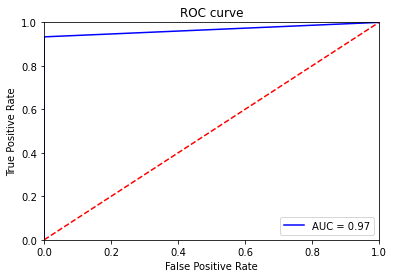

In [190]:
max0 = 0
y_pred_final_log = []
y_test_final_log = []

if accuracy_score(Y_test, GB_pred) > max0:
    max0 = accuracy_score(Y_test, GB_pred)
    y_test_final_log = list(Y_test)
    y_pred_final_log = list(GB_pred)
    X_test_final_log = list(x_test)
plot_roc_curve(y_test_final_log,y_pred_final_log)    

### Confusion Matrix

In [193]:
cm = confusion_matrix(Y_test, GB_pred)
cm

array([[16,  0],
       [ 1, 14]], dtype=int64)

### XGBoost Algorithm 

In [194]:
xgb_model = xgb.XGBClassifier(random_state = 0, objective = 'binary:logistic')
model=xgb_model.fit(x_train, Y_train)
XG_pred = xgb_model.predict(x_test)
print("Accuracy Score: ", accuracy_score(Y_test, XG_pred)*100)

[01:55:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score:  93.54838709677419


## ROC curve for XGBoost Algorithm

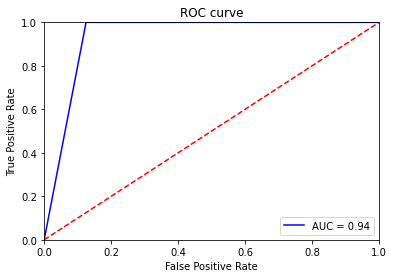

In [195]:
max0 = 0
y_pred_final_log = []
y_test_final_log = []

if accuracy_score(Y_test, XG_pred) > max0:
    max0 = accuracy_score(Y_test, XG_pred)
    y_test_final_log = list(Y_test)
    y_pred_final_log = list(XG_pred)
    X_test_final_log = list(x_test)
plot_roc_curve(y_test_final_log,y_pred_final_log)    

### Confusion Matrix of XG boost Algorithm

In [196]:
cm1 = confusion_matrix(Y_test, XG_pred)
cm1

array([[14,  2],
       [ 0, 15]], dtype=int64)

## Bagging Algorithm 

 ### Bagging meta-estimator

In [197]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=0))
model.fit(x_train, Y_train)
BC_pred=model.predict(x_test)
model.score(x_test,Y_test)
accuracy_score(Y_test, BC_pred) * 100

100.0

## Roc curve of Bagging meta-estimator

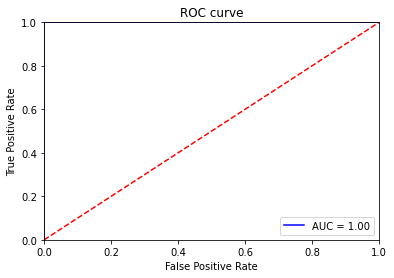

In [198]:
max0 = 0
y_pred_final_log = []
y_test_final_log = []

if accuracy_score(Y_test, BC_pred) > max0:
    max0 = accuracy_score(Y_test, BC_pred)
    y_test_final_log = list(Y_test)
    y_pred_final_log = list(BC_pred)
    X_test_final_log = list(x_test)
plot_roc_curve(y_test_final_log,y_pred_final_log)  

In [199]:
cm2 = confusion_matrix(Y_test, BC_pred)
cm2

array([[16,  0],
       [ 0, 15]], dtype=int64)

# Conclusion

ADHD dataset was considred for this assignment. This dataset consists of two classes ADHD and Control where ADHD means the person is affected with Attention deficit hyperactivity disorder and control means the person is normal.
The labels were also added to these vectors were:-
1 -> ADHD class
0 -> Control class
Finally the dataset was tested against various machine learning models.For each model the best results are summarised below :-

1.)  Bagging Meta Estimatoralgorithm  100%.  

2.)  Gradient Boosting Algorithm 96% 


3.) XGBoost Algorithm 93% 
